# __U.S. Oil and Gas Production Analysis__

## __Loading Modules__

In [665]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [666]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,California,Colorado,Kansas,Louisiana,Montana,North,Ohio,Pennsylvania,Utah,Other,Federal Offshore Gulf Of Mexico,Wyoming,West Virginia,Texas Natural,Oklahoma,New Mexico
0,8-Jun,70626,8875,1196,932,3576,1024,3989,323,243,224,540,1198,2995,7339,6839,670,21446,5241,3975
1,8-Jul,71137,8375,1256,919,3834,1034,4008,324,243,220,512,1200,3150,7468,6940,674,21547,5256,4179
2,8-Aug,70760,8739,1313,881,4056,1033,3896,327,249,220,529,1277,3092,6868,6835,678,21777,4896,4092


In [667]:
# Check how many rows and columns in the dataframe
gas_df.shape

(121, 20)

In [668]:
# Display all the available column names in the dataframe
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'California', 'Colorado',
       'Kansas', 'Louisiana', 'Montana', 'North', 'Ohio', 'Pennsylvania',
       'Utah', 'Other', 'Federal Offshore Gulf Of Mexico', 'Wyoming',
       'West Virginia', 'Texas Natural', 'Oklahoma', 'New Mexico'],
      dtype='object')

In [669]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Month                            121 non-null    object
 1   U.S.                             121 non-null    int64 
 2   Alaska                           121 non-null    int64 
 3   Arkansas                         121 non-null    int64 
 4   California                       121 non-null    int64 
 5   Colorado                         121 non-null    int64 
 6   Kansas                           121 non-null    int64 
 7   Louisiana                        121 non-null    int64 
 8   Montana                          121 non-null    int64 
 9   North                            121 non-null    int64 
 10  Ohio                             121 non-null    int64 
 11  Pennsylvania                     121 non-null    int64 
 12  Utah                             121

In [670]:
gas_df['Month'] = gas_df['Month']+'-'+'2018'

In [671]:
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,California,Colorado,Kansas,Louisiana,Montana,North,Ohio,Pennsylvania,Utah,Other,Federal Offshore Gulf Of Mexico,Wyoming,West Virginia,Texas Natural,Oklahoma,New Mexico
0,8-Jun-2018,70626,8875,1196,932,3576,1024,3989,323,243,224,540,1198,2995,7339,6839,670,21446,5241,3975
1,8-Jul-2018,71137,8375,1256,919,3834,1034,4008,324,243,220,512,1200,3150,7468,6940,674,21547,5256,4179
2,8-Aug-2018,70760,8739,1313,881,4056,1033,3896,327,249,220,529,1277,3092,6868,6835,678,21777,4896,4092


In [672]:
gas_df['Month'].dtype

dtype('O')

In [673]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

In [674]:
gas_df['Month'] = gas_df['Month'].astype('datetime64[ns]')
print(gas_df['Month'].dtype)

datetime64[ns]


In [675]:
gas_df['Month'].dt.year.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Month, dtype: int32

In [676]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int32

---

In [677]:
gas_df.head(2)

,Month,U.S.,Alaska,Arkansas,California,Colorado,Kansas,Louisiana,Montana,North,Ohio,Pennsylvania,Utah,Other,Federal Offshore Gulf Of Mexico,Wyoming,West Virginia,Texas Natural,Oklahoma,New Mexico
0,2018-06-08,70626,8875,1196,932,3576,1024,3989,323,243,224,540,1198,2995,7339,6839,670,21446,5241,3975
1,2018-07-08,71137,8375,1256,919,3834,1034,4008,324,243,220,512,1200,3150,7468,6940,674,21547,5256,4179


How much gas has been produced yearly by each US state, and by the US as a whole?

To answer this question, we need to `aggregate` the rows based on the `year` of the `Month` column. Go ahead, insert a new code cell and code this aggregation. Assign the resulting dataframe to a variable named `yearly_gas_df`.

In [678]:
gas_df['Month'] = gas_df['Month'].dt.strftime('%B')

In [679]:
yearly_gas = gas_df.groupby(gas_df['Month']) #dt.year  si fuer apor año

In [680]:
filter_columns = gas_df.columns[1:]
filter_columns.values.tolist()
print(filter_columns)


Index(['U.S.', 'Alaska', 'Arkansas', 'California', 'Colorado', 'Kansas',
       'Louisiana', 'Montana', 'North', 'Ohio', 'Pennsylvania', 'Utah',
       'Other', 'Federal Offshore Gulf Of Mexico', 'Wyoming', 'West Virginia',
       'Texas Natural', 'Oklahoma', 'New Mexico'],
      dtype='object')


In [681]:
yearly_gas_df =yearly_gas[filter_columns].sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,California,Colorado,Kansas,Louisiana,Montana,North,Ohio,Pennsylvania,Utah,Other,Federal Offshore Gulf Of Mexico,Wyoming,West Virginia,Texas Natural,Oklahoma,New Mexico
Month,,,,,,,,,,,,,,,,,,,
April,840503,92119,25374,6892,45260,7775,60970,1885,10789,19277,88996,11738,21715,42752,58533,24312,223792,61838,36486
August,798073,70031,25212,7058,44929,8254,58368,2015,9645,15296,77244,11790,23573,45396,58119,22278,222930,59176,36758
December,830412,98602,25548,6900,44244,7846,59439,1920,10025,17160,82281,11346,24066,43032,59152,22949,221288,59031,35583
February,837248,96788,24672,7071,45435,7870,60043,1901,10324,18531,88908,11559,23019,43408,58549,23827,220466,59396,35479
January,829942,94930,24882,7041,45527,7905,59263,1903,9967,18248,87925,11353,22331,43352,58952,23441,219559,58661,34704
July,798959,71405,24640,7162,43968,8142,58718,2034,9489,15167,77380,11835,23566,46736,58472,21663,222932,59091,36560
June,898798,89194,26591,7788,48393,8732,65884,2160,11560,19811,89121,12741,24640,48729,64241,25895,246401,66673,40238
March,841352,97099,24919,6889,45284,7873,60760,1888,10543,18430,88188,11703,21971,43425,58857,24181,223048,60030,36266
May,834501,86179,25320,6970,45488,7673,61475,1860,11150,19300,88503,11651,21746,42383,57199,25204,225086,60959,36354


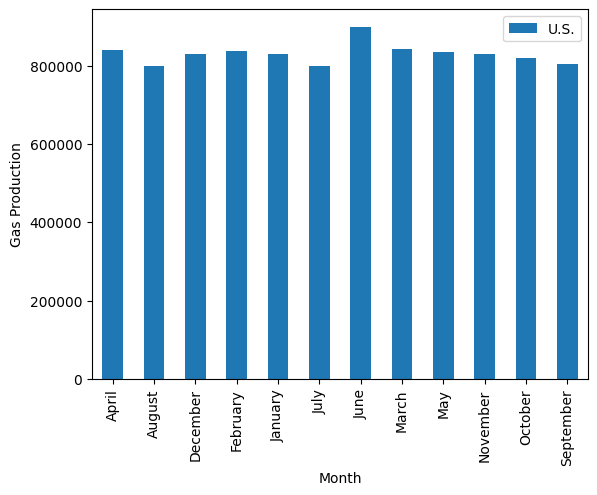

In [682]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Month");
plot.set_ylabel("Gas Production");

## State production

Let's have a look at the yearly production of some specific states

In [683]:
yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore Gulf Of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North', 'Ohio', 'Oklahoma', 'Other', 'Pennsylvania',
       'Texas Natural', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

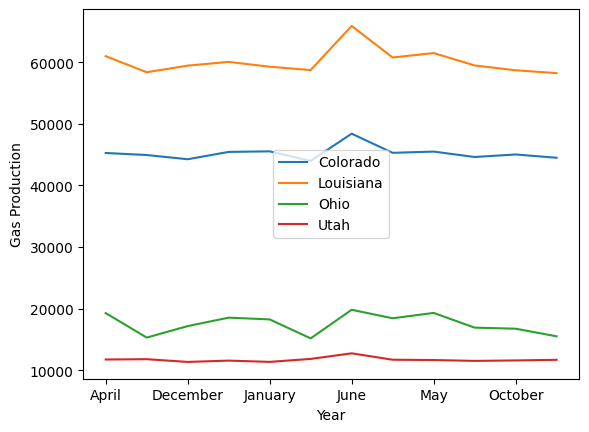

In [684]:
plot = yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year");
plot.set_ylabel("Gas Production");

---

## Comparing with Crude Oil Production

In [685]:
file_2 = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file_2, decimal=",")
oil_df.head(3)

,Month,Colorado,California,Arkansas,Arizona,Alaska,Alabama,Federal Offshore Gulf of Mexico,Federal Offshore Pacific,Florida,...,Ohio,North Dakota,Oklahoma,New York,New Mexico,Nevada,Nebraska,Montana,Missouri,U.S.
0,8-Jun,82,583,17,0,655,21,1326,67,5,...,14,165,186,1,161,1,6,86,0,5138
1,8-Jul,81,586,17,0,640,21,1372,61,6,...,14,172,184,1,163,1,6,84,0,5177
2,8-Aug,82,588,17,0,544,21,1272,70,5,...,14,178,188,1,163,1,7,84,0,5003


In [733]:
oil_df['Month'] = oil_df['Month']+'-'+'2018'

In [735]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'])

/tmp/ipykernel_103740/1840597184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_df['Month'] = pd.to_datetime(oil_df['Month'])


In [737]:
oil_df['Month'] = oil_df['Month'].astype('datetime64[ns]')
oil_df['Month'].dtype

dtype('<M8[ns]')

In [739]:
oil_df['Month'] = oil_df['Month'].dt.strftime('%B')

---

## Yearly Oil production

In [690]:
yearly_oil = oil_df.groupby(oil_df['Month'])

In [691]:
yearly_oil_df = yearly_oil.sum()
yearly_oil_df

,Colorado,California,Arkansas,Arizona,Alaska,Alabama,Federal Offshore Gulf of Mexico,Federal Offshore Pacific,Florida,Idaho,...,Ohio,North Dakota,Oklahoma,New York,New Mexico,Nevada,Nebraska,Montana,Missouri,U.S.
Month,,,,,,,,,,,,,,,,,,,,,
April,2231,5337,164,0,5532,223,14643,413,47,1,...,348,7678,3417,10,3294,10,68,706,3,76513
August,2016,5432,164,0,4728,231,14515,449,51,0,...,318,7153,3114,10,2847,10,71,726,2,71562
December,2130,5326,166,0,5731,235,14646,433,52,1,...,326,7494,3101,10,2985,10,71,711,2,74698
February,2152,5340,166,0,5613,231,14879,433,51,0,...,341,7538,3227,10,3129,10,71,716,2,75605
January,2136,5336,162,0,5507,227,14856,436,51,0,...,336,7412,3227,10,3016,10,70,701,1,74674
July,1947,5414,165,0,4830,228,14562,452,53,1,...,316,7057,2995,10,2813,10,65,727,2,71276
June,2313,5861,180,0,5608,246,15656,476,58,1,...,376,8111,3628,11,3443,11,74,778,2,81377
March,2188,5330,165,0,5651,228,14744,371,53,1,...,337,7609,3411,10,3235,10,70,706,2,76371
May,2271,5327,163,0,5398,225,14454,423,52,1,...,356,7847,3391,10,3310,10,67,701,3,76556


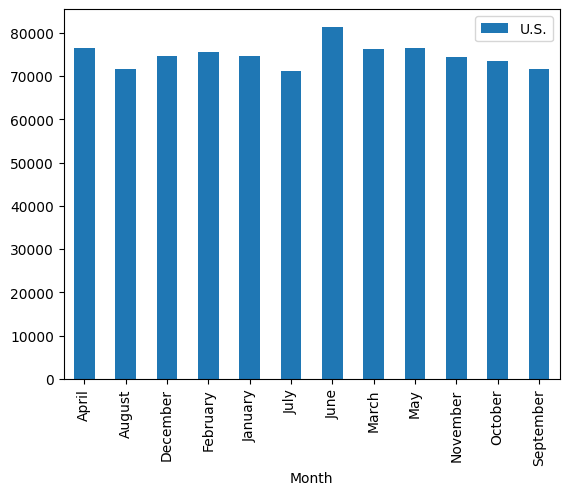

In [692]:
yearly_oil_df.filter(items=['U.S.']).plot(kind='bar');

## Merging Oil and Gas Production

In [718]:
total_gas =pd.DataFrame(yearly_gas_df['U.S.'])
total_gas

,U.S.
Month,
April,840503
August,798073
December,830412
February,837248
January,829942
July,798959
June,898798
March,841352
May,834501


In [746]:
total_gas.rename(columns={'U.S.': 'Gas'}, inplace=True)
total_gas

,Gas
Month,
April,840503
August,798073
December,830412
February,837248
January,829942
July,798959
June,898798
March,841352
May,834501


In [749]:
total_oil = pd.DataFrame(yearly_oil_df['U.S.'])
total_oil

,U.S.
Month,
April,76513
August,71562
December,74698
February,75605
January,74674
July,71276
June,81377
March,76371
May,76556


In [750]:
total_oil.rename(columns={'U.S.': 'Crude Oil'}, inplace=True)
total_oil

,Crude Oil
Month,
April,76513
August,71562
December,74698
February,75605
January,74674
July,71276
June,81377
March,76371
May,76556


In [763]:
merged_df = pd.concat([total_gas, total_oil], axis=1)
merged_df

,Gas,Crude Oil
Month,,
April,840503,76513
August,798073,71562
December,830412,74698
February,837248,75605
January,829942,74674
July,798959,71276
June,898798,81377
March,841352,76371
May,834501,76556


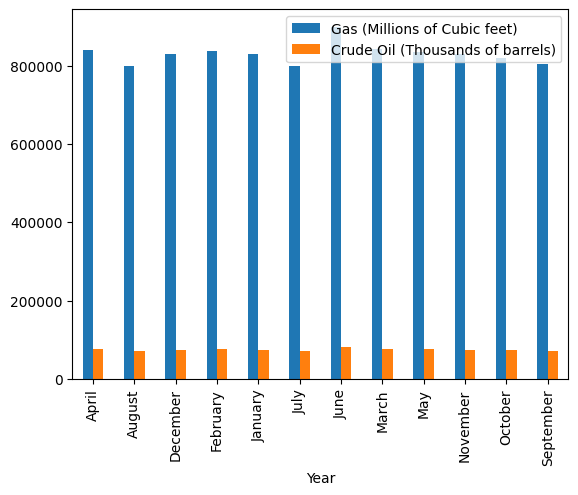

In [764]:
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);